# TRAF7
The TRAF7 gene encodes a member of a family of proteins known as tumor necrosis factor (TNF; see 191160) receptor-associated factors, which are signal transducers for members of the TNF receptor superfamily. [cardiac, facial, and digital anomalies with developmental delay (CAFDADD)](https://omim.org/entry/618164) is caused by heterozygous mutation in the TRAF7 gene.

We searched for published genotype-phenotype correlations but did not identify any relevant publications (Nov. 8, 2024).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### TRAF7
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for TRAF7.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'TRAF7'
mane_tx_id = 'NM_032271.3'
mane_protein_id = 'NP_115647.2' # E3 ubiquitin-protein ligase TRAF7
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 45/45 [00:00<00:00, 214.17 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
23,Patent ductus arteriosus
20,Short neck
20,Blepharophimosis
19,Epicanthus
19,Global developmental delay
17,Feeding difficulties
16,Hypertelorism
15,Pectus carinatum
15,Delayed speech and language development
14,Hypotonia


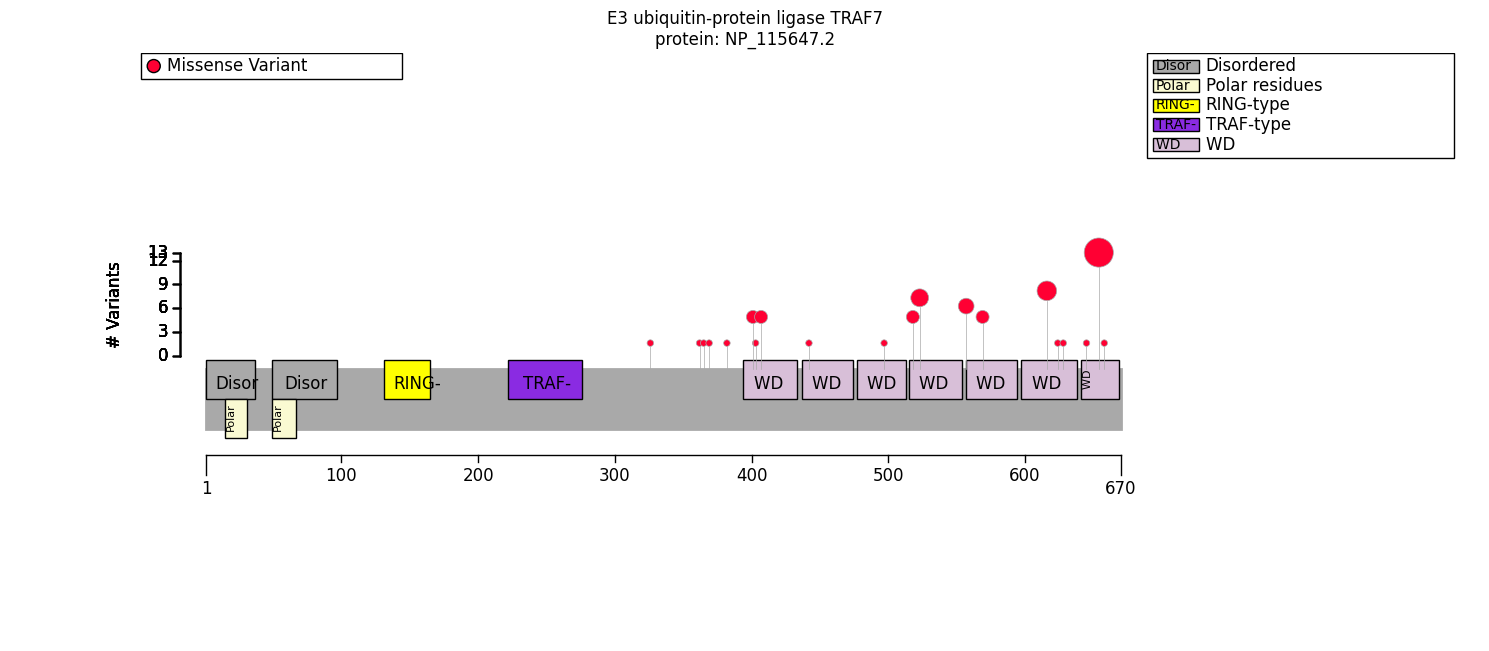

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

traf7_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
traf7_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,2 - 37,
0,Polar residues,Compositional bias,16 - 31,
0,Disordered,Region,50 - 97,
0,Polar residues,Compositional bias,50 - 67,
0,RING-type,Zinc finger,132 - 165,
0,TRAF-type,Zinc finger,223 - 276,
5,WD 1,Repeat,395 - 433,p.Leu402Val; p.Val404Asp; p.Gly408Asp
1,WD 2,Repeat,438 - 474,p.Leu443Arg
1,WD 3,Repeat,478 - 513,p.Lys498Asn
6,WD 4,Repeat,516 - 554,p.Arg524Trp; p.Leu519Phe


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model.genome import Region
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import protein_feature

wd7 = protein_feature(feature_id="WD 7", protein_metadata=protein_meta)
wd7_clf = monoallelic_classifier(
    a_predicate=wd7,
    b_predicate=~wd7,
    a_label="WD7",
    b_label="other"
)
wd7_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=wd7_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(wd7_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,14
"Skipping ""general"" level terms",126
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),749


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=wd7_result)

Allele group,WD7,other,Corrected p values,p values
Seizure [HP:0001250],1/13 (8%),8/29 (28%),1.0,0.231862
Generalized non-motor (absence) seizure [HP:0002121],0/12 (0%),2/23 (9%),1.0,0.536134
Infantile spasms [HP:0012469],0/12 (0%),1/22 (5%),1.0,1.000000
Bilateral tonic-clonic seizure [HP:0002069],0/12 (0%),1/22 (5%),1.0,1.000000
Multifocal seizures [HP:0031165],0/12 (0%),1/22 (5%),1.0,1.000000
Abnormal morphology of the great vessels [HP:0030962],10/10 (100%),15/15 (100%),1.0,1.000000
Abnormal appendicular skeleton morphology [HP:0011844],10/10 (100%),17/17 (100%),1.0,1.000000
Abnormal nasal morphology [HP:0005105],10/10 (100%),18/18 (100%),1.0,1.000000
Abnormality of the nose [HP:0000366],10/10 (100%),18/18 (100%),1.0,1.000000
Abnormality of the vertebral column [HP:0000925],11/11 (100%),16/16 (100%),1.0,1.000000


In [10]:
from gpsea.analysis.predicate import variant_key

r655q = variant_key("16_2176350_2176350_G_A") #c.1964G>A	p.Arg655Gln
r655q_clf = monoallelic_classifier(
    a_predicate=r655q,
    b_predicate= ~r655q,
    a_label='Arg655Gln', 
    b_label='Other variant',
)
r655q_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r655q_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, r655q_result)

Allele group,Arg655Gln,Other variant,Corrected p values,p values
Seizure [HP:0001250],1/11 (9%),8/31 (26%),1.0,0.403189
Feeding difficulties [HP:0011968],4/8 (50%),17/27 (63%),1.0,0.685287
Infantile spasms [HP:0012469],0/10 (0%),1/24 (4%),1.0,1.000000
Bilateral tonic-clonic seizure [HP:0002069],0/10 (0%),1/24 (4%),1.0,1.000000
Multifocal seizures [HP:0031165],0/10 (0%),1/24 (4%),1.0,1.000000
Generalized non-motor (absence) seizure [HP:0002121],0/10 (0%),2/25 (8%),1.0,1.000000
Abnormal appendicular skeleton morphology [HP:0011844],10/10 (100%),17/17 (100%),1.0,1.000000
Abnormal blood vessel morphology [HP:0033353],10/10 (100%),18/18 (100%),1.0,1.000000
Neurodevelopmental delay [HP:0012758],11/11 (100%),27/27 (100%),1.0,1.000000
Abnormal eyelid morphology [HP:0000492],11/11 (100%),28/28 (100%),1.0,1.000000


In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Seizure [HP:0001250],6/16 (38%),3/26 (12%),1.0,0.062817
Generalized non-motor (absence) seizure [HP:0002121],2/12 (17%),0/23 (0%),1.0,0.110924
Bilateral tonic-clonic seizure [HP:0002069],1/11 (9%),0/23 (0%),1.0,0.323529
Infantile spasms [HP:0012469],0/10 (0%),1/24 (4%),1.0,1.000000
Multifocal seizures [HP:0031165],0/10 (0%),1/24 (4%),1.0,1.000000
Abnormal digit morphology [HP:0011297],10/10 (100%),13/13 (100%),1.0,1.000000
Abnormality of the vertebral column [HP:0000925],10/10 (100%),17/17 (100%),1.0,1.000000
Abnormal blood vessel morphology [HP:0033353],10/10 (100%),18/18 (100%),1.0,1.000000
Abnormal size of the palpebral fissures [HP:0200007],10/10 (100%),18/18 (100%),1.0,1.000000
Motor delay [HP:0001270],10/11 (91%),11/11 (100%),1.0,1.000000


# Summary
GPSEA analysis failed to reveal evidence for statistically significant genotype-phenotype correlations in the *TRAF7* gene.

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=wd7_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=r655q_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "No significant correlations identified."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
WD7,other,40,0
Genotype (A),Genotype (B),Tests performed,Significant tests
Arg655Gln,Other variant,40,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,40,0


In [14]:
summarizer.process_latex(report=report, protein_fig=traf7_fig)

Figure saved to ../../supplement/img/TRAF7_protein_diagram-draft.pdf
Output to ../../supplement/tex/TRAF7_summary_draft.tex
